# Entropy

Entropy could be used with probability to denote the gain of information.

The more homogenious the set is - the lower is the level of entropy.
The lower the entropy - the higher the knowledge gain.

If we have a dataset with two classes evenly distributed we get the low knowledge and high entropy.


$$ 
H(x) = -\sum_{i=1}^n p(x_i) \log_2 p(x_i)
$$

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [5]:
bugs = pd.read_csv('data/ml-bugs.csv')
bugs.head()

,Species,Color,Length (mm)
0,Mobug,Brown,11.6
1,Mobug,Blue,16.3
2,Lobug,Blue,15.1
3,Lobug,Green,23.7
4,Lobug,Blue,18.4


## Information gain

The goal is to split the data getting the highest information gain - lower entropy.

$$ 
Information Gain = Entropy(Parent) - [\frac{m}{m + n}Entropy(Child_1) + \frac{m}{m + n}Entropy(Child_2)]
$$

## Entropy

In [96]:
type(bugs['Color']=='Blue')

pandas.core.series.Series

In [164]:
def plot_by_species(df:pd.DataFrame, filter_arg:pd.Series = None):
    if filter_arg is None:
        groups = df.groupby('Species')

        fig, ax = plt.subplots(figsize=(16,5))
        ax.margins(0.05)
        for name, group in groups:
            ax.plot(group.index, group['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
        ax.legend()
        plt.show()
    else:
        true_group = df[filter_arg].groupby('Species')
        false_group = df[~filter_arg].groupby('Species')
        
        fig, axes = plt.subplots(1,2, figsize=(16,5))
        for name, group in true_group:
            axes[0].plot(group.index, group['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
        axes[0].legend()
        for name, group in false_group:
            axes[1].plot(group.index, group['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
        axes[1].legend()
        plt.show()
        
def calculate_entropy(df:pd.DataFrame, parent_filter:pd.Series = bugs['Species']=='Mobug', child_filter:pd.Series = None):
    total_count = df.count()[0]
    g1_count = df[parent_filter].count()[0]
    g2_count = df[~parent_filter].count()[0]
    parent_entropy = -(g1_count/total_count)*math.log(g1_count/total_count) - (g2_count/total_count)*math.log(g2_count/total_count)
    if child_filter is not None:
        child_count = df[child_filter].count()[0]
        g1_count = df[child_filter & parent_filter].count()[0]
        g2_count = df[child_filter & ~parent_filter].count()[0]
        child1_count = -(g1_count/child_count)*math.log(g1_count/child_count) - (g2_count/child_count)*math.log(g2_count/child_count)
        child_count = df[~child_filter].count()[0]
        g1_count = df[~child_filter & parent_filter].count()[0]
        g2_count = df[~child_filter & ~parent_filter].count()[0]
        child2_count = -(g1_count/child_count)*math.log(g1_count/child_count) - (g2_count/child_count)*math.log(g2_count/child_count)
        information_gain = parent_entropy - (child1_count + child2_count)/2
        return parent_entropy, (child1_count, child2_count), information_gain
    return parent_entropy

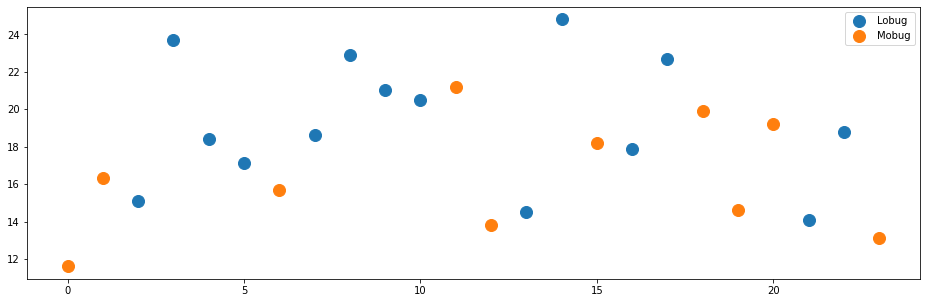

Parent entropy: 0.6791932659915256


In [165]:
plot_by_species(bugs)
print('Parent entropy: {}'.format(calculate_entropy(bugs)))

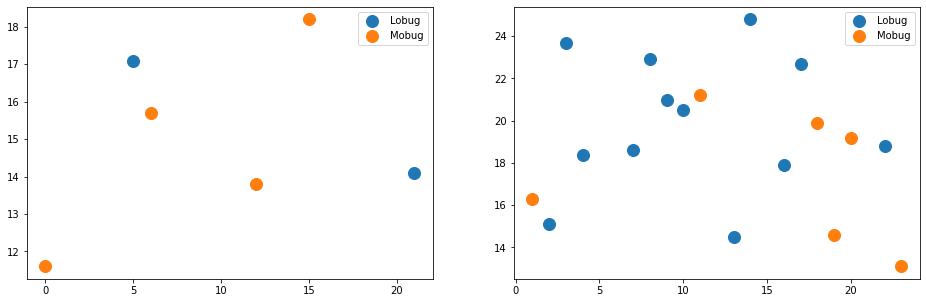

Parent entropy: 0.6791932659915256, Childs entropy: (0.6365141682948128, 0.6365141682948128), Information gain 0.04267909769671285


In [167]:
split_by = bugs['Color']=='Brown'
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropy(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

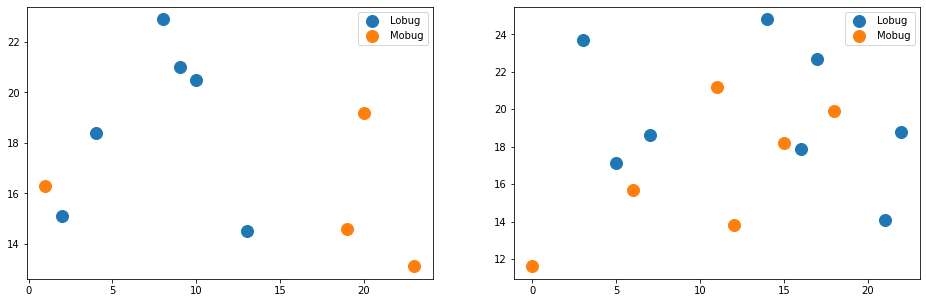

Parent entropy: 0.6791932659915256, Childs entropy: (0.6730116670092565, 0.6829081047004717), Information gain 0.0012333801366615216


In [166]:
split_by = bugs['Color']=='Blue'
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropy(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

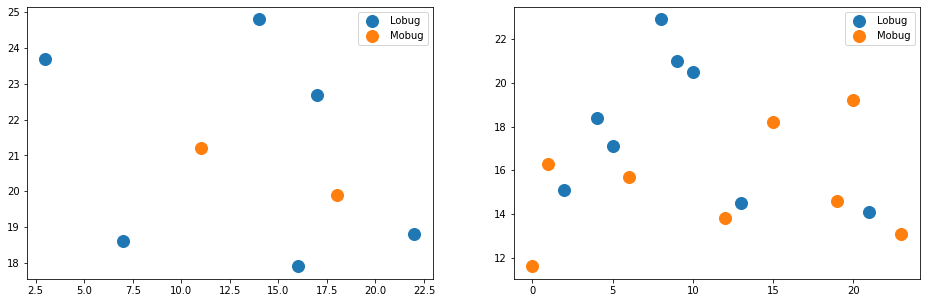

Parent entropy: 0.6791932659915256, Childs entropy: (0.5623351446188083, 0.6931471805599453), Information gain 0.0514521034021489


In [168]:
split_by = bugs['Color']=='Green'
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropy(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

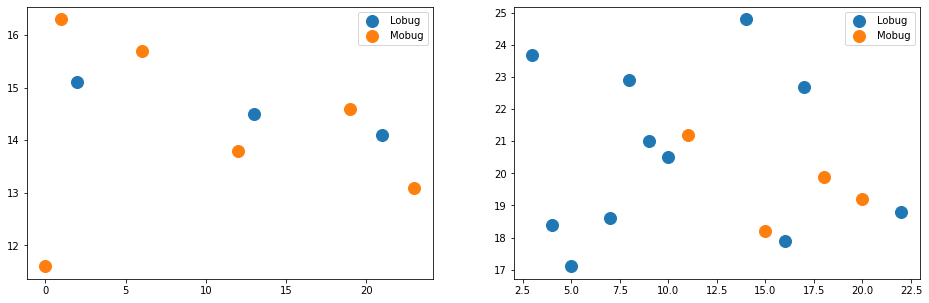

Parent entropy: 0.6791932659915256, Childs entropy: (0.6365141682948128, 0.5799151714181009), Information gain 0.07097859613506885


In [169]:
split_by = bugs['Length (mm)']<17.0
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropy(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

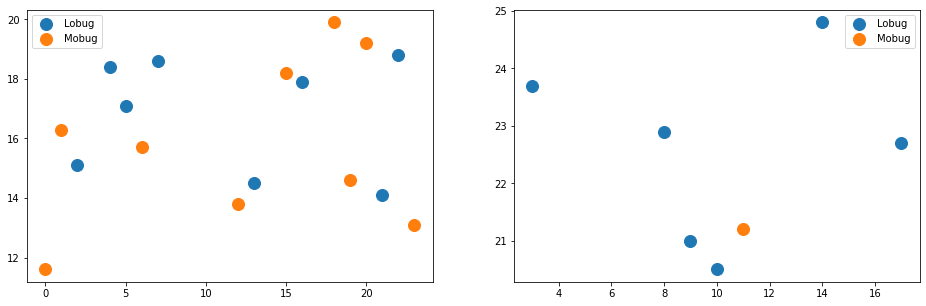

Parent entropy: 0.6791932659915256, Childs entropy: (0.6914160776171183, 0.410116318288409), Information gain 0.12842706803876203


In [170]:
split_by = bugs['Length (mm)']<20.0
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropy(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

In [94]:
#Parent entropy:
mobugs = bugs[bugs['Species']=='Mobug'].count()[0]
lobugs = bugs[bugs['Species']=='Lobug'].count()[0]
all_bugs = mobugs+lobugs
print('No of mobugs: {}, no of lobugs: {}'.format(mobugs, lobugs))

entropy = -(lobugs/all_bugs)*math.log(lobugs/all_bugs) - (mobugs/all_bugs)*math.log(mobugs/all_bugs)
print('Parent entropy: {}'.format(entropy))

No of mobugs: 10, no of lobugs: 14
Parent entropy: 0.6791932659915256


## Step 1: Split by color

Brown


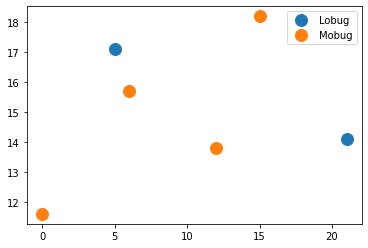

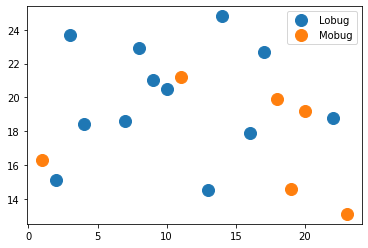

Calculated entropy: 0.6791932659915256
Information gain:
Blue


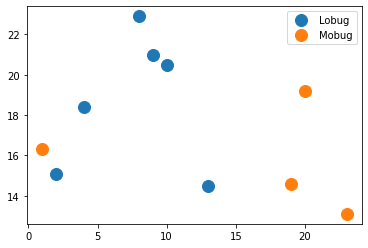

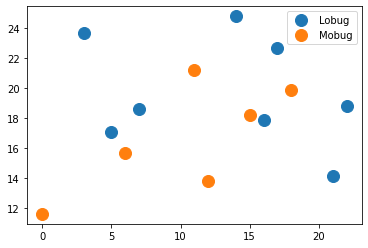

Calculated entropy: 0.6791932659915256
Information gain:
Green


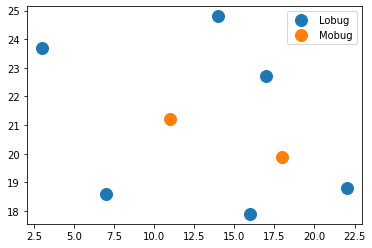

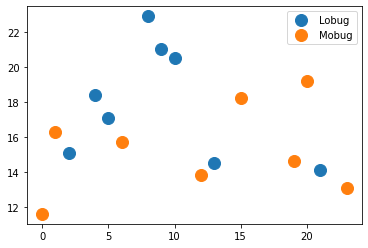

Calculated entropy: 0.6791932659915256
Information gain:


In [95]:
for color in bugs['Color'].unique():
    print(color)
    filtered_bugs = bugs[bugs['Color']==color]
    rest_bugs = bugs[bugs['Color']!=color]
    plot_by_species(filtered_bugs)
    plot_by_species(rest_bugs)
    all_bugs = filtered_bugs.count()[0]
    lobugs = filtered_bugs[filtered_bugs['Species']=='Lobug'].count()[0]
    mobugs = filtered_bugs[filtered_bugs['Species']=='Mobug'].count()[0]
    child_entropy = -(lobugs/all_bugs)*math.log(lobugs/all_bugs) - (mobugs/all_bugs)*math.log(mobugs/all_bugs)
    print('Calculated entropy: {}'.format(entropy))
    information_gain = entropy - child_entropy
    print("Information gain:")

## Entropy for Species


In [66]:
number_of_records = bugs.shape[0]
number_of_lobug = bugs[bugs['Species']=='Lobug'].count().reset_index(name="count").loc[0][1]
number_of_mobug = bugs[bugs['Species']=='Mobug'].count().reset_index(name="count").loc[0][1]

entropy = -(number_of_lobug/number_of_records)*math.log(number_of_lobug/number_of_records) - (number_of_mobug/number_of_records)*math.log(number_of_mobug/number_of_records)

entropy

0.6791932659915256

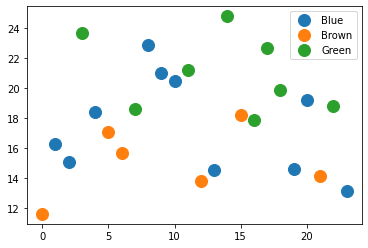

In [67]:
groups = bugs.groupby('Color')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.index, group['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

## Entropy for Colors

In [68]:
number_of_records = bugs.shape[0]
number_of_blue = bugs[bugs['Color']=='Blue'].count().reset_index(name="count").loc[0][1]
number_of_brown = bugs[bugs['Color']=='Brown'].count().reset_index(name="count").loc[0][1]
number_of_green = bugs[bugs['Color']=='Green'].count().reset_index(name="count").loc[0][1]

entropy = -(number_of_blue/number_of_records)*math.log(number_of_blue/number_of_records) - (number_of_brown/number_of_records)*math.log(number_of_brown/number_of_records) - - (number_of_green/number_of_records)*math.log(number_of_green/number_of_records)

entropy

0.3451481346213944

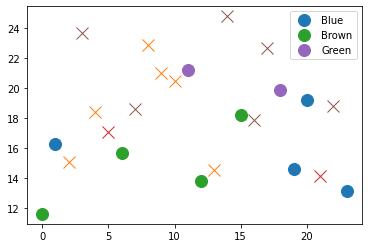

In [44]:
groups = bugs.groupby('Color')
# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group[group['Species']=='Mobug'].index, group[group['Species']=='Mobug']['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
    ax.plot(group[group['Species']=='Lobug'].index, group[group['Species']=='Lobug']['Length (mm)'], marker='x', linestyle='', ms=12)
ax.legend()

plt.show()

In [26]:
for group in groups_lobug:
    print(group)

('Blue',    Species Color  Length (mm)
2    Lobug  Blue         15.1
4    Lobug  Blue         18.4
8    Lobug  Blue         22.9
9    Lobug  Blue         21.0
10   Lobug  Blue         20.5
13   Lobug  Blue         14.5)
('Brown',    Species  Color  Length (mm)
5    Lobug  Brown         17.1
21   Lobug  Brown         14.1)
('Green',    Species  Color  Length (mm)
3    Lobug  Green         23.7
7    Lobug  Green         18.6
14   Lobug  Green         24.8
16   Lobug  Green         17.9
17   Lobug  Green         22.7
22   Lobug  Green         18.8)


In [36]:
for group in groups:
    print(type(group[1]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [39]:
group[group['Species']=='Mobug']['Length (mm)']

1     16.3
19    14.6
20    19.2
23    13.1
Name: Length (mm), dtype: float64

In [38]:
group['Length (mm)']

1     16.3
2     15.1
4     18.4
8     22.9
9     21.0
10    20.5
13    14.5
19    14.6
20    19.2
23    13.1
Name: Length (mm), dtype: float64